# Acne Detection using ResNet

### Training and Validation

### Importing Dependencies

In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

2024-08-03 22:16:22.201881: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 22:16:22.204849: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 22:16:22.214027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 22:16:22.229486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 22:16:22.233990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 22:16:22.244597: I tensorflow/core/platform/cpu_feature_gu

### Load the pre-trained ResNet50 model, excluding the top layers

In [2]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

### Freeze the base model layers

In [3]:
for layer in base_model.layers:
    layer.trainable = False

### Add custom classification layers

In [4]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

### Create the full model

In [5]:
model = Model(inputs=base_model.input, outputs=x)

### Compile the model

In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Data augmentation and generators for training and validation

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
val_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_generator = train_datagen.flow_from_directory(
    "dataset/training/",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 1646 images belonging to 2 classes.


In [10]:
val_generator = val_datagen.flow_from_directory(
    "dataset/validation/",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 112 images belonging to 2 classes.


### Train the model

In [11]:
model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25


/home/agbor/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 503s 9s/step - accuracy: 0.5193 - loss: 1.1255 - val_accuracy: 0.6071 - val_loss: 0.6184
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 488s 9s/step - accuracy: 0.6664 - loss: 0.6031 - val_accuracy: 0.8482 - val_loss: 0.5208
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 466s 9s/step - accuracy: 0.7896 - loss: 0.5354 - val_accuracy: 0.8482 - val_loss: 0.4536
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 533s 9s/step - accuracy: 0.7547 - loss: 0.5135 - val_accuracy: 0.8661 - val_loss: 0.4163
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 489s 9s/step - accuracy: 0.8193 - loss: 0.4595 - val_accuracy: 0.6607 - val_loss: 0.5617
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 492s 9s/step - accuracy: 0.7824 - loss: 0.4677 - val_accuracy: 0.7768 - val_loss: 0.4554
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 508s 9s/step - accuracy: 0.8165 - loss: 0.4328 - val_accuracy: 0.8661 - val_loss: 0.3388
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 490s 9s/step - accuracy: 0.8273 - loss: 0.4154 - val_accuracy: 0.8571 - val_loss: 0.

### Model Evaluation

In [12]:
test_generator = val_datagen.flow_from_directory(
    "dataset/testing/",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 96 images belonging to 2 classes.


In [13]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.5742 - loss: 1.1115
Test Accuracy: 0.72
Test Loss: 0.72


### Confusion Matrix

In [17]:
# Import functions for evaluating classification performance from scikit-learn
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels from the test generator
# This will be an array of true class labels for the test dataset
true_labels = test_generator.classes

# Generate predictions for the test dataset using the trained model
# This method returns the predicted probabilities for each class
predictions = model.predict(test_generator)

# Convert the predicted probabilities to binary labels
# Using a threshold of 0.5 for binary classification
# Reshape the array to ensure it matches the shape of true_labels
predicted_labels = (predictions > 0.5).astype(int).reshape(-1)

# Compute the confusion matrix to evaluate the performance of the model
# The confusion matrix provides insights into true positives, false positives, true negatives, and false negatives
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# Generate a classification report that includes precision, recall, and F1-score
# This report provides a detailed evaluation of the model's performance for each class
print(classification_report(true_labels, predicted_labels))


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
[[21 27]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        48
           1       0.64      1.00      0.78        48

    accuracy                           0.72        96
   macro avg       0.82      0.72      0.69        96
weighted avg       0.82      0.72      0.69        96



### Heatmap of Confusion Matrix

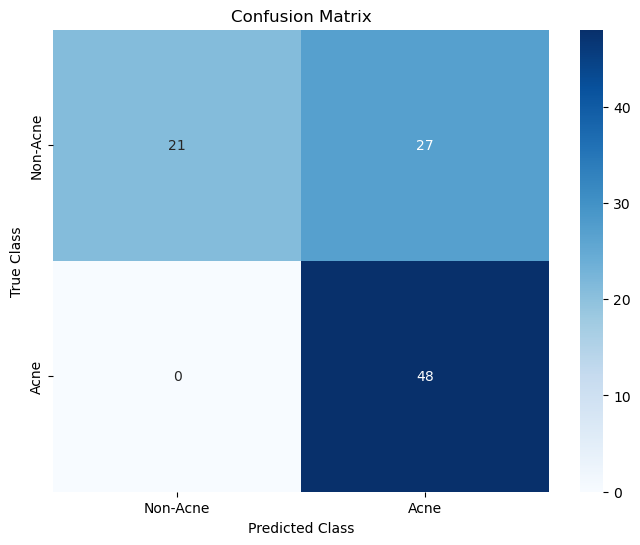

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume true_labels and predicted_labels are already defined as in the previous example

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class names
class_names = ['Non-Acne', 'Acne']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### ROC Curve and AUC (Area Under the Curve)

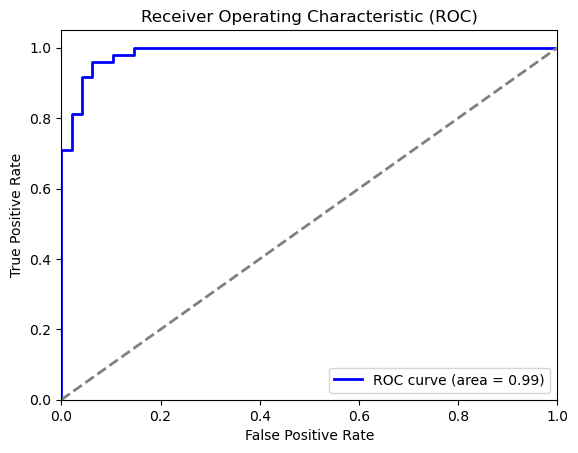

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Precision vs Recall vs F1-Score

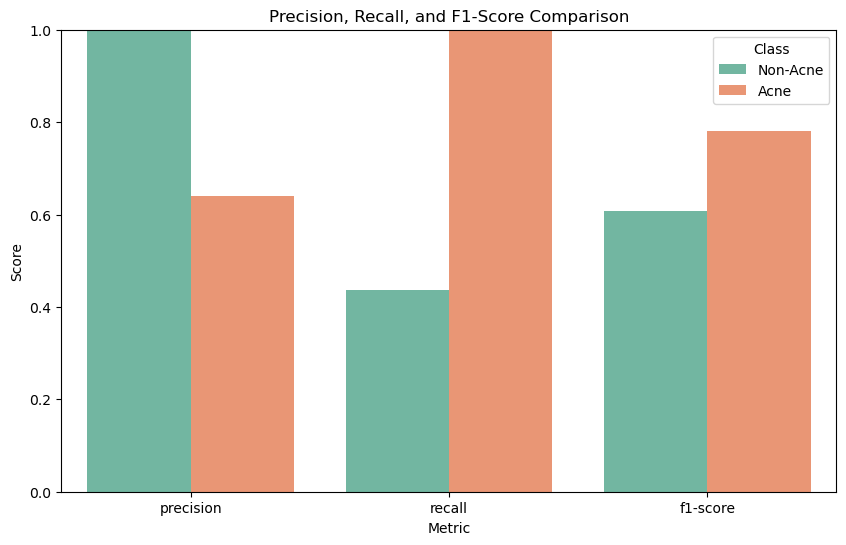

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming true_labels and predicted_labels are defined
# true_labels: Actual labels
# predicted_labels: Predicted labels by the model

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=['Non-Acne', 'Acne'], output_dict=True)

# Extract Precision, Recall, and F1-Score for each class
metrics = ['precision', 'recall', 'f1-score']
classes = ['Non-Acne', 'Acne']
values = {metric: [report[class_name][metric] for class_name in classes] for metric in metrics}

# Convert to a format suitable for seaborn
metrics_data = []
for metric, scores in values.items():
    for score, class_name in zip(scores, classes):
        metrics_data.append({'Metric': metric, 'Class': class_name, 'Score': score})

# Create a DataFrame
import pandas as pd
df_metrics = pd.DataFrame(metrics_data)

# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Class', data=df_metrics, palette='Set2')
plt.title('Precision, Recall, and F1-Score Comparison')
plt.ylim(0, 1)  # All metrics are between 0 and 1
plt.ylabel('Score')
plt.show()


### Matthews Correlation Coefficient (MCC)

These metrics provide a more comprehensive evaluation of your model's performance, helping to understand its strengths and weaknesses, especially in the context of medical diagnostics where accurate classification is critical.

In [21]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(true_labels, predicted_labels)
print(f'MCC: {mcc:.2f}')


MCC: 0.53


### Making a single prediction

In [16]:
# Import necessary libraries
import numpy as np  # For numerical operations
from tensorflow.keras.preprocessing import image  # For image preprocessing
from tensorflow.keras.applications.vgg16 import preprocess_input  # For VGG16-specific preprocessing
from tensorflow.keras.models import load_model  # For loading a saved model

# Load and preprocess the image
img_path = "dataset/single_prediction/eczema.jpeg"  # Path to the image file
img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it to 224x224 pixels
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (1, 224, 224, 3)
img_array = preprocess_input(img_array)  # Apply VGG16-specific preprocessing (scaling pixel values)

# Make a prediction using the trained model
prediction = model.predict(img_array)  # Get the predicted probability from the model
prediction_class = (prediction > 0.5).astype(int)  # Convert probability to binary class label

# Map prediction to class label
class_labels = ['Non-Acne', 'Acne']  # Define the class labels
predicted_label = class_labels[prediction_class[0][0]]  # Get the predicted class label

# Print the predicted class label
print(f'Predicted Label: {predicted_label}')  # Output the predicted label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Label: Acne


### Saving the Model

In [23]:
from tensorflow.keras.models import save_model

# Assuming `model` is your trained Keras model
model.save('ResNetModel.h5')  # Save model to HDF5 file
